## Importando Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lendo o arquivo *csv*

In [3]:
ransomware = pd.read_csv('Attacks.csv')
print(ransomware.columns)

Index(['Target', 'AKA', 'description ', 'sector',
       'organisation size 1,5,10,25,100,300 ', 'revenue $USD million ', 'cost',
       'ransom cost', 'data note', 'ransom paid', 'YEAR code', 'YEAR', 'month',
       'location', 'interesting story (edited)', 'interesting story (long)',
       'interesting story?', 'Ransomware', 'stock symbol', 'revenue as of',
       'no of employees', 'Data Note', 'Source Name', 'URL', 'URL 2', 'URL 3',
       'URL 4', 'URL 5', '#ID'],
      dtype='object')


## Removendo informações que não serão necessárias

In [4]:
# Leitura da base de dados
ransomware = pd.read_csv('Attacks.csv')

# Utilizando o operador de indexação .drop() para excluir as colunas
colunas_para_excluir = ['organisation size 1,5,10,25,100,300 ', 'AKA', 'description ', 'data note', 'YEAR code', 'interesting story (edited)', 'interesting story (long)', 'interesting story?', 'stock symbol','revenue as of', 'no of employees', 'Data Note', 'URL', 'URL 2', 'URL 3', 'URL 4', 'URL 5', 'Source Name','#ID']
ransomware.drop(columns=colunas_para_excluir, inplace=True)

# renomeando colunas
ransomware.columns = ['Organizacao', 'setor', 'Receite_em_milhões($USD)', 'CustodoAtaque', 'ValordeResgate', 'Resgate', 'AnodoAtaque', 'Mes', 'LocaldaEmpresa','NomedoRansomware']

# Verificando as colunas do DataFrame após as operações de exclusão e renomeação
print(ransomware.columns)

Index(['Organizacao', 'setor', 'Receite_em_milhões($USD)', 'CustodoAtaque',
       'ValordeResgate', 'Resgate', 'AnodoAtaque', 'Mes', 'LocaldaEmpresa',
       'NomedoRansomware'],
      dtype='object')


In [5]:
# Verificando os nomes únicos na coluna 'setor'
nomes_setor = ransomware['setor'].unique()

# Imprimindo os nomes únicos
print(nomes_setor)

['tech' nan 'healthcare' 'government' 'academic' 'energy' 'transport'
 'misc' 'finance' 'healthcare, tech' 'retail' 'gaming' 'logistics' 'media'
 'food & beverage' 'legal' 'tech ' 'media & sports' 'telecomms' 'finace'
 'automotive' 'logistics, telecoms' 'telecoms' 'military' 'mixed']


In [6]:
# Corrigindo valores da coluna 'setor'
ransomware['setor'] = ransomware['setor'].replace('telecomms', 'telecoms')


print(ransomware['setor'])

0            tech
1             NaN
2      healthcare
3      government
4             NaN
          ...    
353         mixed
354    government
355         mixed
356         mixed
357         mixed
Name: setor, Length: 358, dtype: object


In [7]:
display(ransomware)

,Organizacao,setor,Receite_em_milhões($USD),CustodoAtaque,ValordeResgate,Resgate,AnodoAtaque,Mes,LocaldaEmpresa,NomedoRansomware
0,Kaseya,tech,300.0,70,70.00000,unknown,2021,JUL,USA,REvil
1,Salvation Army,NaN,NaN,unknown,NaN,unknown,2021,JUN,UK,unknown
2,Grupo Fleury,healthcare,686.0,unknown,NaN,unknown,2021,JUN,Brazil,REvil
3,City of Liege,government,NaN,unknown,NaN,unknown,2021,JUN,Belgium,Ryuk
4,Lucky Star Casino,NaN,9.0,unknown,NaN,unknown,2021,JUN,USA,unknown
...,...,...,...,...,...,...,...,...,...,...
353,"""TeslaCrypt""",mixed,1.0,76520,0.07652,unknown,2015,NaN,Worldwide,TeslaCrypt
354,New Hampshire PD,government,1.0,$2000-$3000,0.00300,unknown,2014,JUN,USA,CryptoWall
355,Apple devices,mixed,1.0,$100 per device,5.00000,unknown,2014,MAY,Australia,Not revealed
356,"""Cryptowall""",mixed,1.0,18,18.00000,unknown,2014,NaN,Worldwide,CryptoWall


## Analisando a Dataframe

##### Setores mais afetados por Ransomware

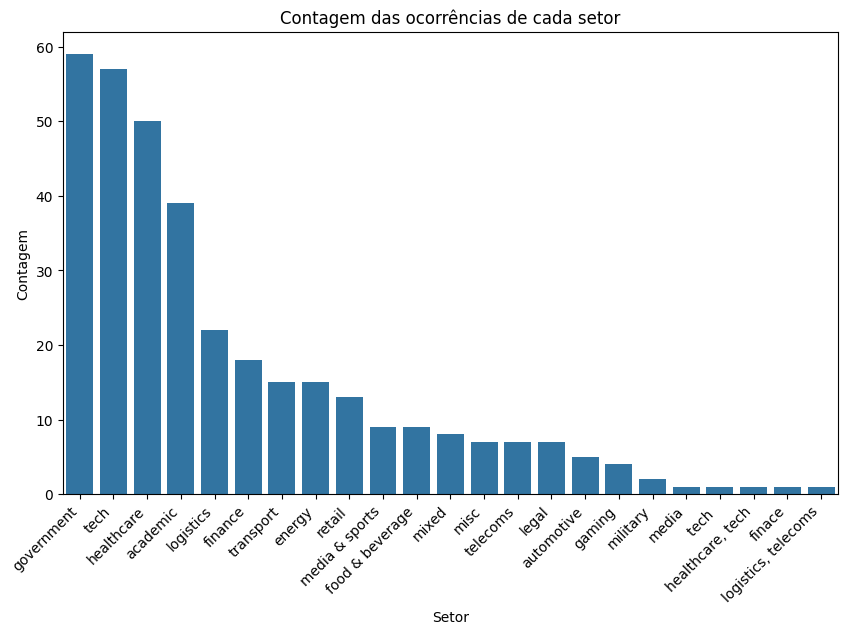

In [8]:
# Verificando as ocorrências de cada setor
contagem_setor = ransomware['setor'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_setor.index, y=contagem_setor.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Setor')
plt.ylabel('Contagem')
plt.title('Contagem das ocorrências de cada setor')
plt.show()

##### Países mais afetados por ataques por Ransomware

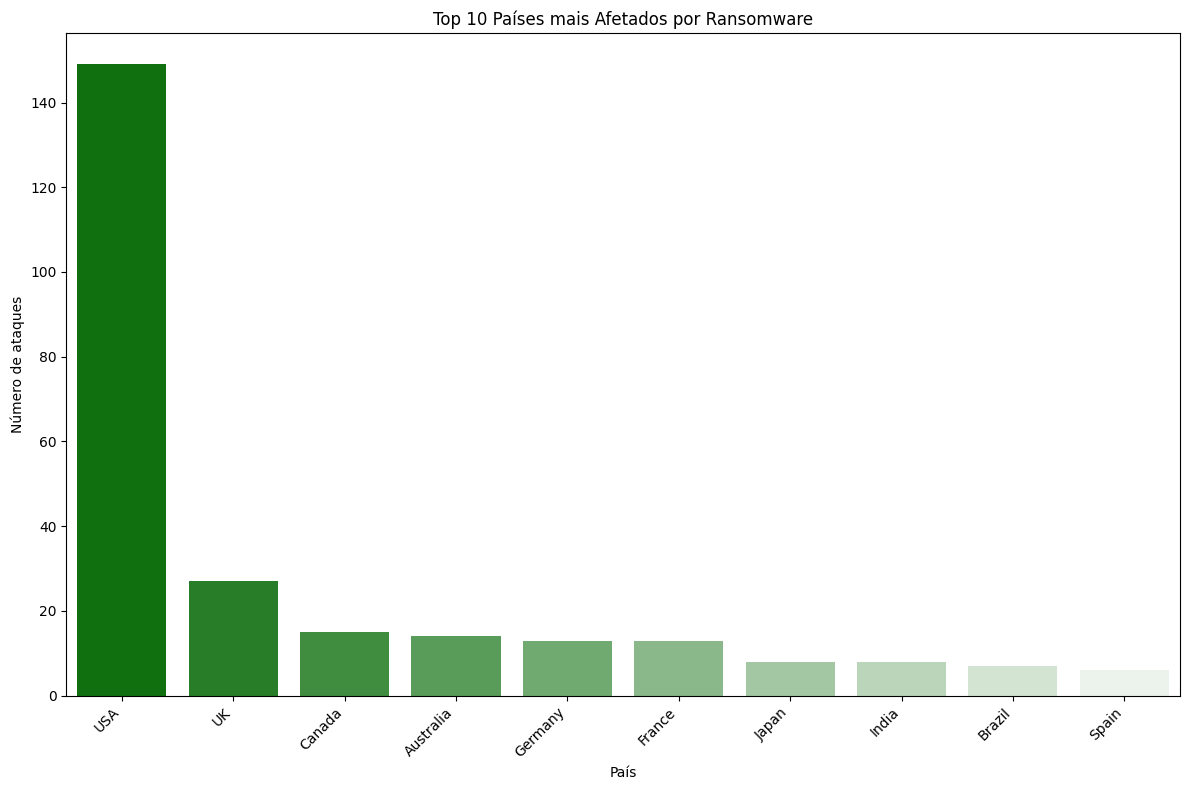

In [9]:
# Analisando os ataques por país
contagem_paises = ransomware['LocaldaEmpresa'].value_counts()

# Selecionando os 10 países mais afetados
top_10_paises = contagem_paises.head(10)

# Criando uma paleta de cores personalizada 
cores_escuras = sns.light_palette("green", n_colors=10, reverse=True)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_paises.index, y=top_10_paises.values, hue=top_10_paises.index, palette=cores_escuras, legend=False)
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.title('Top 10 Países mais Afetados por Ransomware')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Ransomware mais utilizados

In [10]:
# Verificando os nomes únicos na coluna 'NomedoRansomware'
nomes_ransomware = ransomware['NomedoRansomware'].unique()

# Imprimindo os nomes únicos
print(nomes_ransomware)

['REvil' 'unknown' 'Ryuk' 'Avaddon' 'Qbot' 'Ragnar Locker' 'Xing Team'
 'Conti' 'Babuk ' 'Lockbit' 'Babuk Locker' 'Astro' 'Clop' 'DarkSide'
 'Ragnarok' 'SYNack' 'Egregor' 'Cuba ransomware' 'PYSA' 'Mount Locker' nan
 'SamSam' 'iEncrypt' 'WannaCry' 'NotPetya' 'QBot' 'Not revealed'
 'DoppelPaymer' 'HelloKitty' 'RansomEXX' 'Hotarus Corp' 'Phoenix Locker'
 'Babuk' 'Maze' 'Netwalker' 'NetWalker' 'Black Shadow' 'CLOP' 'Snake'
 'Nefilim' 'EvilCorp' 'WastedLocker' 'MountLocker' 'Pay2Key' 'RansomExx'
 'Erkan' 'Defray' 'LockBit' 'Darkside' 'TA505' 'TrickBot, Ryuk'
 'RobbinHood' 'Shadow Kill Hackers' 'NotPetya & Petya' 'BadRabbit'
 'HDDCryptor' 'Armada Collective' 'CryptoWall' 'TeslaCrypt' 'CryptoLocker']


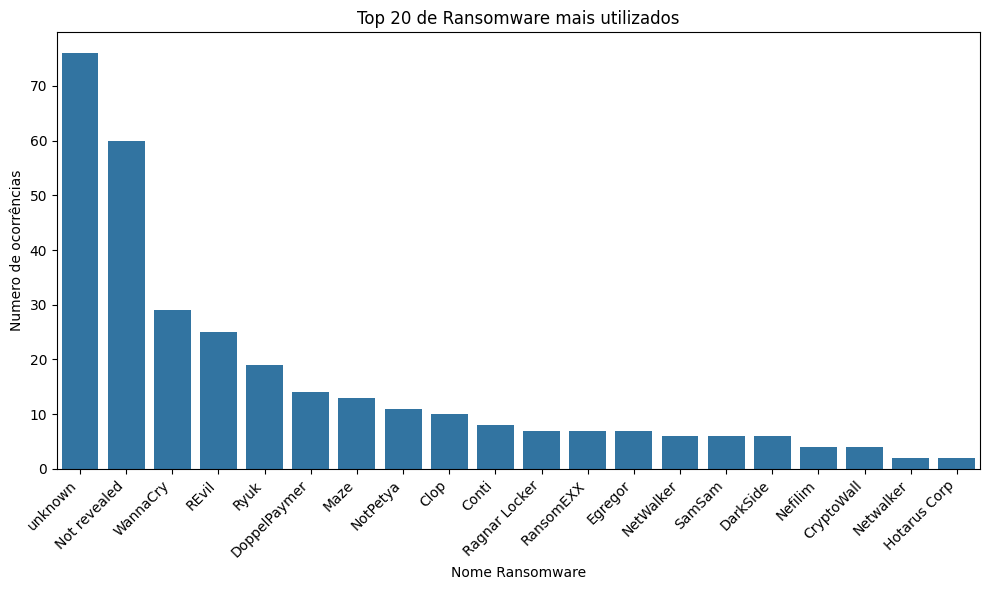

In [11]:
most_used_ransomware = ransomware['NomedoRansomware'].value_counts()
most_used_ransomware_head = most_used_ransomware.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_used_ransomware_head.index, y=most_used_ransomware_head.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nome Ransomware')
plt.ylabel('Numero de ocorrências')
plt.title('Top 20 de Ransomware mais utilizados')
plt.tight_layout()
plt.show()

##### Removendo da análise Ransoware não identificados

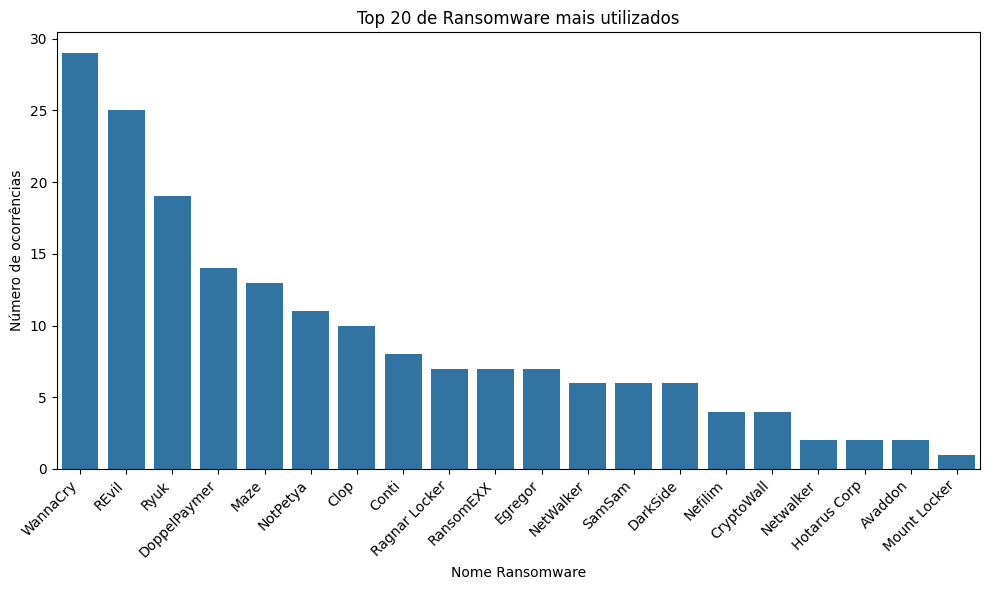

In [12]:
# Realizando a contagem de ransomware
most_used_ransomware = ransomware['NomedoRansomware'].value_counts()

# Excluindo 'unknown' e 'not revealed' da contagem
most_used_ransomware = most_used_ransomware.drop(['unknown', 'Not revealed'])

# Selecionar os 20 ransomware mais utilizados
most_used_ransomware_head = most_used_ransomware.head(20)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=most_used_ransomware_head.index, y=most_used_ransomware_head.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nome Ransomware')
plt.ylabel('Número de ocorrências')
plt.title('Top 20 de Ransomware mais utilizados')
plt.tight_layout()
plt.show()

##### Verificando quais anos apresentaram maior ocorrência de ataques por Ransomware

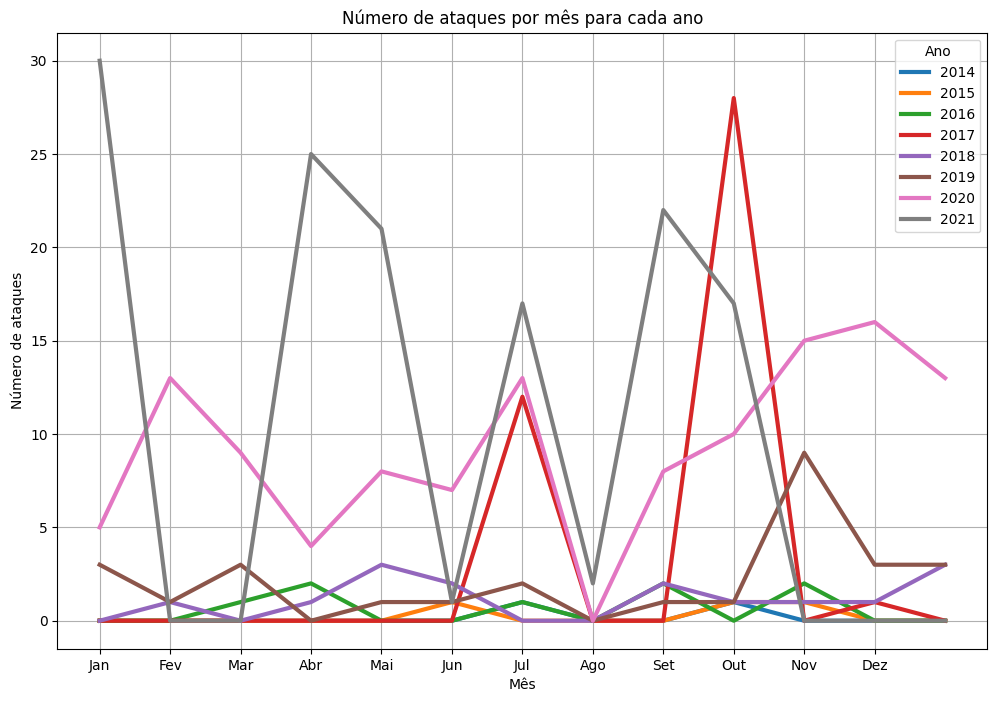

In [13]:
# Realizando a contagem de ataques por mês para cada ano
contagem_meses_por_ano = ransomware.groupby(['AnodoAtaque', 'Mes']).size().unstack(fill_value=0)

# Plotando o gráfico de linha com gradiente de cores
plt.figure(figsize=(12, 8))
for ano in contagem_meses_por_ano.index:
    sns.lineplot(x=contagem_meses_por_ano.columns, y=contagem_meses_por_ano.loc[ano], label=str(ano), linewidth=3)
plt.xlabel('Mês')
plt.ylabel('Número de ataques')
plt.title('Número de ataques por mês para cada ano')
plt.legend(title='Ano', loc='upper right')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

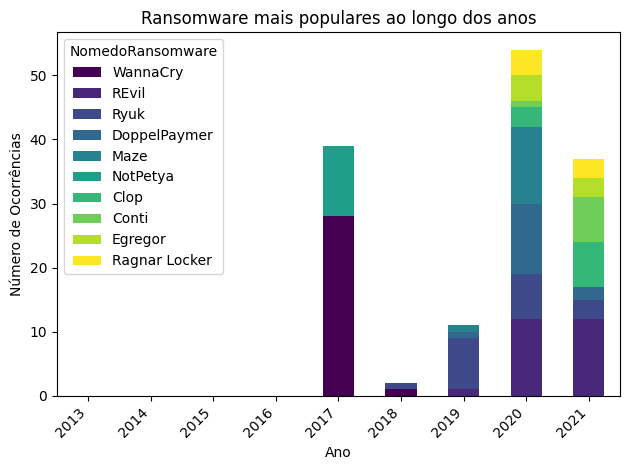

In [14]:
# Analisando ransomware mais populares ano
ransomware_ano = ransomware[['AnodoAtaque', 'NomedoRansomware']]

# Filtrar ransomwares "unknown" e "Not revealed"
ransomware_ano = ransomware_ano[(ransomware_ano['NomedoRansomware'] != 'unknown') & (ransomware_ano['NomedoRansomware'] != 'Not revealed')]

# Realizando a contagem de ocorrências de cada ransomware ao longo dos anos
contagem_ransomware_ano = ransomware_ano.groupby(['AnodoAtaque', 'NomedoRansomware']).size().unstack(fill_value=0)

# Selecionando os 10 Ransomware mais populares
top_10_ransomware = contagem_ransomware_ano.sum().nlargest(10).index

# Filtrando os ransomwares mais populares
contagem_ransomware_ano = contagem_ransomware_ano[top_10_ransomware]

# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
contagem_ransomware_ano.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.title('Ransomware mais populares ao longo dos anos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Ransomwares mais populares do Brasil

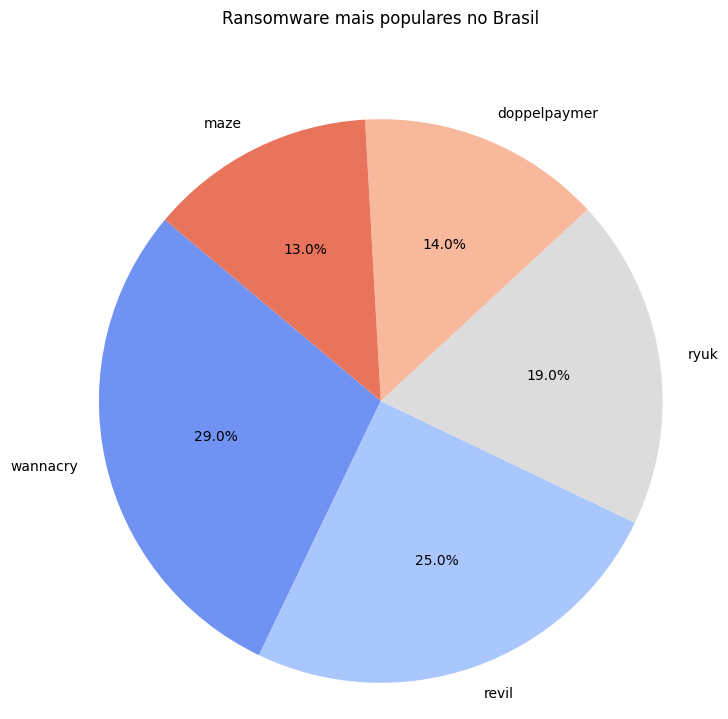

In [15]:
# Substituindo "RansomExx" por "RansomEXX" na coluna "NomedoRansomware"
ransomware['NomedoRansomware'] = ransomware['NomedoRansomware'].str.lower().replace('ransomexx', 'RansomEXX')

#  Analisando ocorrências de cada ransomware no Brasil
contagem_ransomware_brazil = ransomware['NomedoRansomware'].value_counts()

# Removendo 'unknown' e 'not revealed' da contagem
contagem_ransomware_brazil = contagem_ransomware_brazil.drop(['unknown', 'not revealed'], errors='ignore')

# Selecionando os 10 Ransomware mais populares no Brasil
top_10_ransomware_brazil = contagem_ransomware_brazil.head(5)

# Criando uma paleta de cores com degradê do azul ao vermelho 
paleta_cores = sns.color_palette("coolwarm", n_colors=5)

# Plotar o gráfico de pizza com a paleta de cores em degradê
plt.figure(figsize=(8, 8))
plt.pie(top_10_ransomware_brazil.values, labels=top_10_ransomware_brazil.index, colors=paleta_cores, autopct='%1.1f%%', startangle=140)
plt.title('Ransomware mais populares no Brasil', pad = 50)
plt.axis('equal')
plt.show()